In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import mglearn

Text(0, 0.5, 'Target')

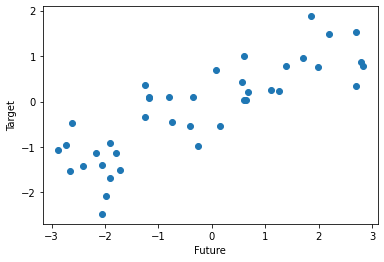

In [2]:
# wave dataset : 回帰

X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.xlabel("Future")
plt.ylabel("Target")

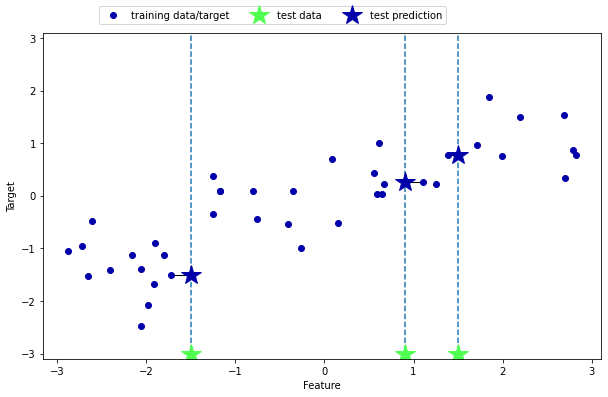

In [3]:
# n =1
mglearn.plots.plot_knn_regression(n_neighbors=1)

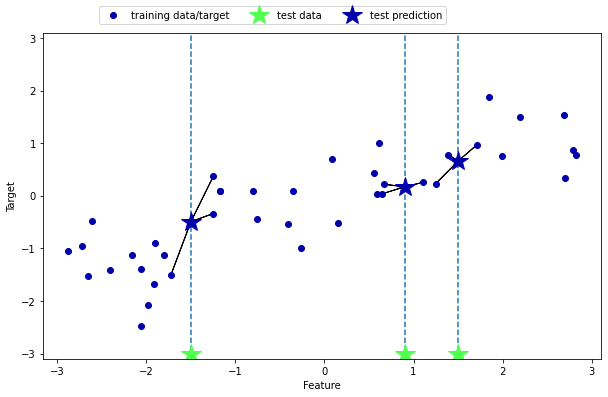

In [4]:
# n =3
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [10]:
# 3つの最近傍点を考慮するように設定してモデルのインスタンスを生成
reg = KNeighborsRegressor(n_neighbors=3)
# 訓練データと訓練ターゲットを用いてモデルを学習させる
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [11]:
# testデータの予測
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [12]:
# .testセットのR2スコア
reg.score(X_test, y_test)

0.8344172446249605

### KNeighborsRegressorの解析

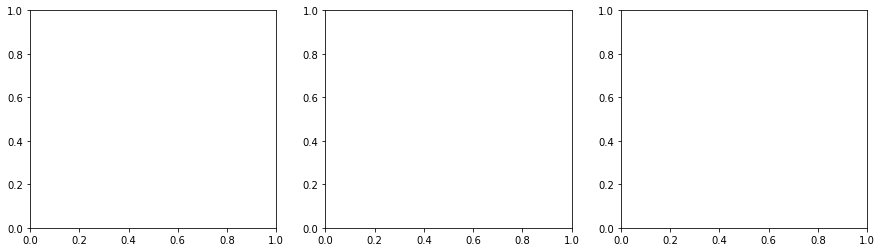

In [13]:
fig, axes = plt.subplots(1,3,figsize=(15,4))

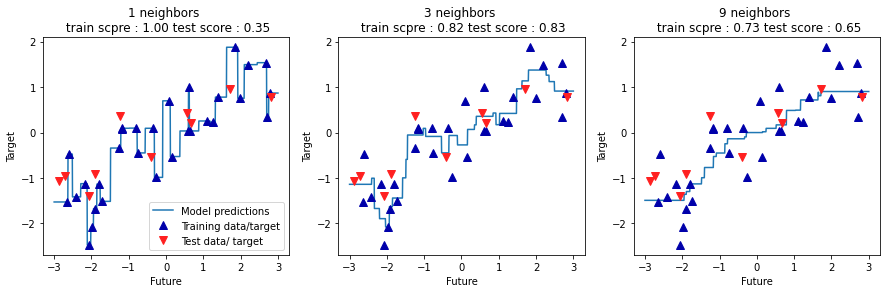

In [54]:
import numpy as np
fig, axes = plt.subplots(1,3,figsize=(15,4))
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8) # train dataのplot
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8) # test dataのplot
    
    ax.set_title(
        "{} neighbors \n train scpre : {:.2f} test score : {:.2f}".format(
            n_neighbors, 
            reg.score(X_train, y_train),
            reg.score(X_test, y_test)
        )
    )
    ax.set_xlabel("Future")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target", "Test data/ target"], loc="best")